In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC 
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_regression, make_swiss_roll
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor,  RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVR

In [2]:
df = pd.read_csv("tedsd_puf_2019.csv")
df.head()

DISYR       CASEID  STFIPS  CBSA2010  EDUC  MARSTAT  SERVICES  DETCRIM  \
0   2019  20191553576       2        -9     4        1         7       -9   
1   2019  20191465214       2        -9     3        1         7       -9   
2   2019  20191443889       2        -9     2        1         7       -9   
3   2019  20191409377       2        -9     3        1         7       -9   
4   2019  20191479567       2        -9     3        3         7       -9   

   LOS  PSOURCE  ...  TRNQFLG  BARBFLG  SEDHPFLG  INHFLG  OTCFLG  OTHERFLG  \
0   37        1  ...        0        0         0       0       0         0   
1   35        1  ...        0        0         0       0       0         0   
2   35        1  ...        0        0         0       0       0         0   
3   37        1  ...        0        0         0       0       0         0   
4   37        1  ...        0        0         0       0       0         0   

   DIVISION  REGION  IDU  ALCDRUG  
0         9       4    0        1  
1         9       4    0        3  
2         9       4    0        3  
3         9       4    0        3  
4         9       4    0        1  

[5 rows x 76 columns]

In [3]:
df1 = df.copy()
# from conversation with "house of Hope recovery" class 4 which is "transfer to a different facility" would also be considered a success.
for value in df1['REASON']:
    if value == 1:
        value = value
    elif value == 4:
        value = 1
    else:
        value = 0
df1['REASON'] = df1['REASON'].replace(4, 1)
df1['REASON'] = df1['REASON'].replace(2, 0)
df1['REASON'] = df1['REASON'].replace(3, 0)
df1['REASON'] = df1['REASON'].replace(5, 0)
df1['REASON'] = df1['REASON'].replace(6, 0)
df1['REASON'] = df1['REASON'].replace(7, 0)
df1['REASON'].value_counts()

REASON
1    1095432
0     627071
Name: count, dtype: int64

In [4]:
# time to clean up the data starting with SUB1_D 
# alcohol could be a success, mmj could be a success
for value in df1['SUB1_D']:
    if value == 1 or value == 14 or value == 16 or value == 18 or value == 12 or value == 13 or value == 2:
        value = 1
    else:
        value = 0
df1['SUB1_D'] = df1['SUB1_D'].replace(14, 1)
df1['SUB1_D'] = df1['SUB1_D'].replace(16, 1)
df1['SUB1_D'] = df1['SUB1_D'].replace(18, 1)
df1['SUB1_D'] = df1['SUB1_D'].replace(12, 1)
df1['SUB1_D'] = df1['SUB1_D'].replace(13, 1)
df1['SUB1_D'] = df1['SUB1_D'].replace(2, 1)
df1['SUB1_D'] = df1['SUB1_D'].replace(3, 0)
df1['SUB1_D'] = df1['SUB1_D'].replace(4, 0)
df1['SUB1_D'] = df1['SUB1_D'].replace(5, 0)
df1['SUB1_D'] = df1['SUB1_D'].replace(6, 0)
df1['SUB1_D'] = df1['SUB1_D'].replace(7, 0)
df1['SUB1_D'] = df1['SUB1_D'].replace(8, 0)
df1['SUB1_D'] = df1['SUB1_D'].replace(9, 0)
df1['SUB1_D'] = df1['SUB1_D'].replace(10, 0)
df1['SUB1_D'] = df1['SUB1_D'].replace(11, 0)
df1['SUB1_D'] = df1['SUB1_D'].replace(15, 0)
df1['SUB1_D'] = df1['SUB1_D'].replace(17, 0)
df1['SUB1_D'] = df1['SUB1_D'].replace(19, 0)

df1['SUB1'] = df1['SUB1'].replace(14, 1)
df1['SUB1'] = df1['SUB1'].replace(16, 1)
df1['SUB1'] = df1['SUB1'].replace(18, 1)
df1['SUB1'] = df1['SUB1'].replace(12, 1)
df1['SUB1'] = df1['SUB1'].replace(13, 1)
df1['SUB1'] = df1['SUB1'].replace(2, 1)
df1['SUB1'] = df1['SUB1'].replace(3, 0)
df1['SUB1'] = df1['SUB1'].replace(4, 0)
df1['SUB1'] = df1['SUB1'].replace(5, 0)
df1['SUB1'] = df1['SUB1'].replace(6, 0)
df1['SUB1'] = df1['SUB1'].replace(7, 0)
df1['SUB1'] = df1['SUB1'].replace(8, 0)
df1['SUB1'] = df1['SUB1'].replace(9, 0)
df1['SUB1'] = df1['SUB1'].replace(10, 0)
df1['SUB1'] = df1['SUB1'].replace(11, 0)
df1['SUB1'] = df1['SUB1'].replace(15, 0)
df1['SUB1'] = df1['SUB1'].replace(17, 0)
df1['SUB1'] = df1['SUB1'].replace(19, 0)

df1['SUB2_D'] = df1['SUB2_D'].replace(14, 1)
df1['SUB2_D'] = df1['SUB2_D'].replace(16, 1)
df1['SUB2_D'] = df1['SUB2_D'].replace(18, 1)
df1['SUB2_D'] = df1['SUB2_D'].replace(12, 1)
df1['SUB2_D'] = df1['SUB2_D'].replace(13, 1)
df1['SUB2_D'] = df1['SUB2_D'].replace(2, 1)
df1['SUB2_D'] = df1['SUB2_D'].replace(3, 0)
df1['SUB2_D'] = df1['SUB2_D'].replace(4, 0)
df1['SUB2_D'] = df1['SUB2_D'].replace(5, 0)
df1['SUB2_D'] = df1['SUB2_D'].replace(6, 0)
df1['SUB2_D'] = df1['SUB2_D'].replace(7, 0)
df1['SUB2_D'] = df1['SUB2_D'].replace(8, 0)
df1['SUB2_D'] = df1['SUB2_D'].replace(9, 0)
df1['SUB2_D'] = df1['SUB2_D'].replace(10, 0)
df1['SUB2_D'] = df1['SUB2_D'].replace(11, 0)
df1['SUB2_D'] = df1['SUB2_D'].replace(15, 0)
df1['SUB2_D'] = df1['SUB2_D'].replace(17, 0)
df1['SUB2_D'] = df1['SUB2_D'].replace(19, 0)

df1['SUB2'] = df1['SUB2'].replace(14, 1)
df1['SUB2'] = df1['SUB2'].replace(16, 1)
df1['SUB2'] = df1['SUB2'].replace(18, 1)
df1['SUB2'] = df1['SUB2'].replace(12, 1)
df1['SUB2'] = df1['SUB2'].replace(13, 1)
df1['SUB2'] = df1['SUB2'].replace(2, 1)
df1['SUB2'] = df1['SUB2'].replace(3, 0)
df1['SUB2'] = df1['SUB2'].replace(4, 0)
df1['SUB2'] = df1['SUB2'].replace(5, 0)
df1['SUB2'] = df1['SUB2'].replace(6, 0)
df1['SUB2'] = df1['SUB2'].replace(7, 0)
df1['SUB2'] = df1['SUB2'].replace(8, 0)
df1['SUB2'] = df1['SUB2'].replace(9, 0)
df1['SUB2'] = df1['SUB2'].replace(10, 0)
df1['SUB2'] = df1['SUB2'].replace(11, 0)
df1['SUB2'] = df1['SUB2'].replace(15, 0)
df1['SUB2'] = df1['SUB2'].replace(17, 0)
df1['SUB2'] = df1['SUB2'].replace(19, 0)

df1['SUB3_D'] = df1['SUB3_D'].replace(14, 1)
df1['SUB3_D'] = df1['SUB3_D'].replace(16, 1)
df1['SUB3_D'] = df1['SUB3_D'].replace(18, 1)
df1['SUB3_D'] = df1['SUB3_D'].replace(12, 1)
df1['SUB3_D'] = df1['SUB3_D'].replace(13, 1)
df1['SUB3_D'] = df1['SUB3_D'].replace(2, 1)
df1['SUB3_D'] = df1['SUB3_D'].replace(3, 0)
df1['SUB3_D'] = df1['SUB3_D'].replace(4, 0)
df1['SUB3_D'] = df1['SUB3_D'].replace(5, 0)
df1['SUB3_D'] = df1['SUB3_D'].replace(6, 0)
df1['SUB3_D'] = df1['SUB3_D'].replace(7, 0)
df1['SUB3_D'] = df1['SUB3_D'].replace(8, 0)
df1['SUB3_D'] = df1['SUB3_D'].replace(9, 0)
df1['SUB3_D'] = df1['SUB3_D'].replace(10, 0)
df1['SUB3_D'] = df1['SUB3_D'].replace(11, 0)
df1['SUB3_D'] = df1['SUB3_D'].replace(15, 0)
df1['SUB3_D'] = df1['SUB3_D'].replace(17, 0)
df1['SUB3_D'] = df1['SUB3_D'].replace(19, 0)

df1['SUB3'] = df1['SUB3'].replace(14, 1)
df1['SUB3'] = df1['SUB3'].replace(16, 1)
df1['SUB3'] = df1['SUB3'].replace(18, 1)
df1['SUB3'] = df1['SUB3'].replace(12, 1)
df1['SUB3'] = df1['SUB3'].replace(13, 1)
df1['SUB3'] = df1['SUB3'].replace(2, 1)
df1['SUB3'] = df1['SUB3'].replace(3, 0)
df1['SUB3'] = df1['SUB3'].replace(4, 0)
df1['SUB3'] = df1['SUB3'].replace(5, 0)
df1['SUB3'] = df1['SUB3'].replace(6, 0)
df1['SUB3'] = df1['SUB3'].replace(7, 0)
df1['SUB3'] = df1['SUB3'].replace(8, 0)
df1['SUB3'] = df1['SUB3'].replace(9, 0)
df1['SUB3'] = df1['SUB3'].replace(10, 0)
df1['SUB3'] = df1['SUB3'].replace(11, 0)
df1['SUB3'] = df1['SUB3'].replace(15, 0)
df1['SUB3'] = df1['SUB3'].replace(17, 0)
df1['SUB3'] = df1['SUB3'].replace(19, 0)
# df1['SUB1_D'].notna().value_counts()
# time to clean up the data starting with SUB1 
# alcohol could be a success, mmj could be a success, using the same values for SUB1_D
for value in df1['SUB1']:
    if value == 1 or value == 14 or value == 16 or value == 18 or value == 12 or value == 13 or value == 2:
        value = 1
    else:
        value = 0
for value in df1['SUB2_D']:
    if value == 1 or value == 14 or value == 16 or value == 18 or value == 12 or value == 13 or value == 2:
        value = 1
    else:
        value = 0
# df1['SUB1_D'].notna().value_counts()
# time to clean up the data starting with SUB1 
# alcohol could be a success, mmj could be a success, using the same values for SUB1_D
for value in df1['SUB2']:
    if value == 1 or value == 14 or value == 16 or value == 18 or value == 12 or value == 13 or value == 2:
        value = 1
    else:
        value = 0
for value in df1['SUB3_D']:
    if value == 1 or value == 14 or value == 16 or value == 18 or value == 12 or value == 13 or value == 2:
        value = 1
    else:
        value = 0
# df1['SUB1_D'].notna().value_counts()
# time to clean up the data starting with SUB1 
# alcohol could be a success, mmj could be a success, using the same values for SUB1_D
for value in df1['SUB3']:
    if value == 1 or value == 14 or value == 16 or value == 18 or value == 12 or value == 13 or value == 2:
        value = 1
    else:
        value = 0
df1['SUB1'] = df1['SUB1'].replace(-9, 0)
df1['SUB1_D'] = df1['SUB1_D'].replace(-9, 0)
df1['SUB2'] = df1['SUB2'].replace(-9, 0)
df1['SUB2_D'] = df1['SUB2_D'].replace(-9, 0)
df1['SUB3'] = df1['SUB3'].replace(-9, 0)
df1['SUB3_D'] = df1['SUB3_D'].replace(-9, 0)
print(df1['SUB1'].value_counts())
print(df1['SUB1_D'].value_counts())
print(df1['SUB2'].value_counts())
print(df1['SUB2_D'].value_counts())
print(df1['SUB3'].value_counts())
print(df1['SUB3_D'].value_counts())

# df1['SUB1_D'].notna().value_counts()
# # In column SUB2 replace -9 with 19
df1['SUB2'] = df1['SUB2'].replace(-9, 19)
# print(df1['SUB2'].value_counts())
# # In column SUB2_D replace -9 with 19
# # df1['SUB2_D'] = df1['SUB2_D'].replace(-9, 19)
# print(df1['SUB2_D'].value_counts())
# # In column SUB3 replace -9 with 19
# # df1['SUB3'] = df1['SUB3'].replace(-9, 19)
# print(df1['SUB3'].value_counts())
# # In column SUB3_D replace -9 with 0
# # df1['SUB3_D'] = df1['SUB3_D'].replace(-9, 0)
# print(df1['SUB3_D'].value_counts())

SUB1
0    1145410
1     577093
Name: count, dtype: int64
SUB1_D
0    1153301
1     569202
Name: count, dtype: int64
SUB2
1    959459
0    763044
Name: count, dtype: int64
SUB2_D
1    990170
0    732333
Name: count, dtype: int64
SUB3
1    1278583
0     443920
Name: count, dtype: int64
SUB3_D
1    1403980
0     318523
Name: count, dtype: int64


In [5]:
# time to clean up the data with FREQ1_D, FREQ2_D, FREQ3_D
# replacing -9 in the columns with 1 since 1 indicates 'no use' and if data was missing we assumed it was irrelivent to begin with
df1['FREQ1_D'] = df1['FREQ1_D'].replace(-9, 1)
df1['FREQ2_D'] = df1['FREQ2_D'].replace(-9, 1)
df1['FREQ3_D'] = df1['FREQ3_D'].replace(-9, 1)

In [6]:
# time to clean up the data with FREQ1, FREQ2, FREQ3
# replacing -9 in the columns with 1 since 1 indicates 'no use' and if data was missing we assumed it was irrelivent to begin with
df1['FREQ1'] = df1['FREQ1'].replace(-9, 1)
df1['FREQ2'] = df1['FREQ2'].replace(-9, 1)
df1['FREQ3'] = df1['FREQ3'].replace(-9, 1)

In [7]:
# time to clean up the data with 'CASEID'
df1['CASEID'].notna().value_counts()
# CASEID has no null values and does need info filled
# we can drop this field
df1 = df1.drop(columns="CASEID")

In [8]:
# time to clean up the data with 'AGE'
df1['AGE'].notna().value_counts()
# AGE has no null values and does need info filled

AGE
True    1722503
Name: count, dtype: int64

In [9]:
# time to clean up the data with 'GENDER'
# gender is not a columns where we can fill in the data and not decrease the accuracy. so for all -9 values I am replacing with 0
df1['GENDER'] = df1['GENDER'].replace(-9, 0)
df1['GENDER'].notna().value_counts()

GENDER
True    1722503
Name: count, dtype: int64

In [10]:
# time to clean up the data with 'DISYR'
df1['DISYR'].notna().value_counts()
# DISYR has no null values and does need info filled
# drop this column
df1 = df1.drop(columns="DISYR")

In [11]:
# time to clean up the data with 'RACE'
# for race, '7' indicateds 'other single race  so for all -9 values i replaces them with 7
df1['RACE'] = df1['RACE'].replace(-9, 7)
df1['RACE'].notna().value_counts()

RACE
True    1722503
Name: count, dtype: int64

In [12]:
# time to clean up the data with 'ETHNIC'
# for ETHNIC, '4' indicateds 'other single race  so for all -9 values I replaced them with 4
df1['ETHNIC'] = df1['ETHNIC'].replace(-9, 4)
df1['ETHNIC'].notna().value_counts()

ETHNIC
True    1722503
Name: count, dtype: int64

In [13]:
# time to clean up the data with 'MARSTAT'
# for MARSTAT, hard to determine what to fill -9 with so filling with 0 for now
df1['MARSTAT'] = df1['MARSTAT'].replace(-9, 0)
df1['MARSTAT'].notna().value_counts()

MARSTAT
True    1722503
Name: count, dtype: int64

In [14]:
# time to clean up the data with 'EDUC'
# for EDUC, hard to determine what to fill -9 with. options are 1-5 so filling with 2 as it seems like a fair average
df1['EDUC'] = df1['EDUC'].replace(-9, 2)
df1['EDUC'].notna().value_counts()

EDUC
True    1722503
Name: count, dtype: int64

In [15]:
# time to clean up the data with 'EMPLOY' and 'EMPLOY_D'
# for EMPLOY, hard to determine what to fill -9 with. options are 1-4. filling with 2 for now since if the data is missing is seems like that would indicate 'unemployed'
df1['EMPLOY'] = df1['EMPLOY'].replace(-9, 0)
df1['EMPLOY_D'] = df1['EMPLOY_D'].replace(-9, 0)
df1['EMPLOY'].notna().value_counts()

EMPLOY
True    1722503
Name: count, dtype: int64

In [16]:
# time to clean up the data with 'DETNLF' and 'DETNLF_D'
# for DETNLF, its just details on the previous columns not in labor force option so im replacing missing values with 0 as to not affect the results as much. we may want to drop this column
# df1['DETNLF'] = df1['DETNLF'].replace(-9, 0)
# df1['DETNLF_D'] = df1['DETNLF_D'].replace(-9, 0)
# df1['DETNLF'].notna().value_counts()
# drop this column
df1 = df1.drop(columns="DETNLF")
df1 = df1.drop(columns="DETNLF_D")

In [17]:
# time to clean up the data with 'PREG'
# for PREG, -9 most likely indicates male patients. replacing with 0 as to not affect the results as much. 
df1['PREG'] = df1['PREG'].replace(-9, 2)
df1['PREG'].notna().value_counts()

PREG
True    1722503
Name: count, dtype: int64

In [18]:
# time to clean up the data with 'VET'
# for VET, -9 most likely indicates not a veteren so im replacing -9 with 2 for 'no'
df1['VET'] = df1['VET'].replace(-9, 2)
df1['VET'].value_counts()

VET
2    1679845
1      42658
Name: count, dtype: int64

In [19]:
# time to clean up the data with 'LIVARAG'
# for LIVARAG, its hard to determine what -9 could indicate so im replacing -9 with 0 as to not affect the data as much with the -9's in this column
df1['LIVARAG'] = df1['LIVARAG'].replace(-9, 1)
df1['LIVARAG_D'] = df1['LIVARAG_D'].replace(-9, 1)
df1['LIVARAG'].value_counts()

LIVARAG
3    1013787
1     436264
2     272452
Name: count, dtype: int64

In [20]:
# time to clean up the data with 'PRIMINC'
# for PRIMINC, its hard to determine what -9 could indicate so im replacing -9 with 4 at House of Hope's request for "other" being average
df1['PRIMINC'] = df1['PRIMINC'].replace(-9, 4)
df1['PRIMINC'].value_counts()

PRIMINC
4    855478
5    397327
1    312986
2     81605
3     75107
Name: count, dtype: int64

In [21]:
# time to clean up the data with 'ARRESTS' and 'ARRESTS_D'
# for 'ARRESTS' and 'ARRESTS_D', 0 indicates none so im setting -9 to none as that seems most likely to be the case if the information is missing
df1['ARRESTS'] = df1['ARRESTS'].replace(-9, 0)
df1['ARRESTS_D'] = df1['ARRESTS_D'].replace(-9, 0)
df1['ARRESTS'].value_counts()
df1['ARRESTS_D'].value_counts()

ARRESTS_D
0    1643399
1      61908
2      17196
Name: count, dtype: int64

In [22]:
# time to clean up the data with ' STFIPS'
# for ' STFIPS', there are no null values in this column but we may want to remove it because the large values could through the accuracy off
df1['STFIPS'].notna().value_counts()
# drop this column
df1 = df1.drop(columns="STFIPS")

In [23]:
# time to clean up the data with 'REGION'
# for 'REGION', there are no null values in this column but we may want to remove it because the values could through the accuracy off and it doesnt seem to be relevant data
df1['REGION'].value_counts()

REGION
1    532413
3    505555
4    378260
2    303497
0      2778
Name: count, dtype: int64

In [24]:
# time to clean up the data with 'DIVISION'
# for 'DIVISION', there are no null values in this column
df1['DIVISION'].value_counts()

DIVISION
2    372934
5    331617
8    229376
1    159479
4    152327
3    151170
9    148884
6    100660
7     73278
0      2778
Name: count, dtype: int64

In [25]:
# time to clean up the data with 'SERVICES and SERVICES_D'
# for 'SERVICES and SERVICES_D', there are no null values in this column
df1['SERVICES'].value_counts()
df1['SERVICES_D'].value_counts()

SERVICES_D
7    884266
2    240303
6    235771
4    179737
5    121470
1     43446
8     13267
3      4243
Name: count, dtype: int64

In [26]:
# time to clean up the data with 'DAYWAIT'
# for 'DAYWAIT', its seems safe to replace a value of missing data with a value of '0' to indicate that they didnt wait
df1['DAYWAIT'] = df1['DAYWAIT'].replace(-9, 0)
df1['DAYWAIT'].value_counts()

DAYWAIT
0    1469735
1     175018
2      34722
3      26618
4      16410
Name: count, dtype: int64

In [27]:
# time to clean up the data with 'METHUSE'
# for 'METHUSE', its seems safe to replace a value of missing data with a value of 'none'
df1['METHUSE'] = df1['METHUSE'].replace(-9, 0)
df1['METHUSE'].value_counts()

METHUSE
2    1327459
1     216239
0     178805
Name: count, dtype: int64

In [28]:
# time to clean up the data with 'LOS'
# for 'LOS', stands for length of stay this data seems irrelivent to the questions we are trying to answer so I suggest dropping the column to perserve prediction accuracy
# 1-30, 31-45, 46-60, 61-90, 91-120, 121-180, 181-365, more than
def los_to_category(days):
    if days <= 30:
        return 1
    elif days <= 31:
        return 2
    elif days <= 32:
        return 3
    elif days <= 33:
        return 4
    elif days <= 34:
        return 5
    elif days <= 35:
        return 6
    elif days <= 36:
        return 7
    else:
        return 8
# Test cases

# df1['LOS'].value_counts()

In [29]:
print(los_to_category(15))  # Expected output: 1
print(los_to_category(35))  # Expected output: 2
print(los_to_category(50))  # Expected output: 3
print(los_to_category(70))  # Expected output: 4
print(los_to_category(100))  # Expected output: 5
print(los_to_category(150))  # Expected output: 6
print(los_to_category(200))  # Expected output: 7
print(los_to_category(400))  # Expected output: 8
print(los_to_category(-5))  # Expected output: None

1
6
8
8
8
8
8
8
1


In [30]:
df1['LOS'] = df1['LOS'].apply(los_to_category)

In [31]:
df1['LOS'].value_counts()

LOS
1    934659
4    140555
7    128974
5    114387
6    114266
2    111830
8     93500
3     84332
Name: count, dtype: int64

In [32]:
# time to clean up the data with PSOURCE: Referral source
# for 'PSOURCE' this doesnt seem to me to be relevant data so im replacing -9 with 1 for now to indicate that it was self motivated
df1['PSOURCE'] = df1['PSOURCE'].replace(-9, 1)

In [33]:
# time to clean up the data with DETCRIM: Detailed criminal justice referral
# for 'DETCRIM' im replacing -9 with 0 for now. most of this data is missing. we may want to drop this column
df1['DETCRIM'] = df1['DETCRIM'].replace(-9, 0)
# drop this column
df1 = df1.drop(columns="DETCRIM")

In [34]:
# time to clean up the data with NOPRIOR: Previous substance use treatment episodes
# for 'NOPRIOR' im replacing -9 with 0 for now. its could go either way. we will ask clients
df1['NOPRIOR'] = df1['NOPRIOR'].replace(-9, 0)

In [35]:
# time to clean up the data with ROUTE1: Route of administration (primary)
# time to clean up the data with ROUTE2: Route of administration (secondary)
# time to clean up the data with ROUTE3: Route of administration (tertiary)
# for 'ROUTE1' replacing -9 with 0 at house of Hope's request
df1['ROUTE1'] = df1['ROUTE1'].replace(-9, 0)
df1['ROUTE2'] = df1['ROUTE2'].replace(-9, 0)
df1['ROUTE3'] = df1['ROUTE3'].replace(-9, 0)

In [36]:
# time to clean up the data with FRSTUSE1: Age at first use (primary)
# FRSTUSE1 is a column where its hard to determine what a value of -9 should be replaced with so im replacing it with 0 for now to have less of an impact on the data
df1['FRSTUSE1'] = df1['FRSTUSE1'].replace(-9, 3)
# adding Beau's code
# In column FRSTUSE2 replace -9 with 0
df1['FRSTUSE2'] = df1['FRSTUSE2'].replace(-9, 3)
print(df1['FRSTUSE2'].value_counts())
# In column FRSTUSE3 replace -9 with 0
df1['FRSTUSE3'] = df1['FRSTUSE3'].replace(-9, 3)
print(df1['FRSTUSE3'].value_counts())


FRSTUSE2
3    1067078
2     170892
4     153705
7     103384
5      95617
6      78339
1      53488
Name: count, dtype: int64
FRSTUSE3
3    1464306
2      78630
4      57055
7      37209
5      32205
6      27655
1      25443
Name: count, dtype: int64


In [37]:
# In column SUB2 replace -9 with 19
df1['SUB2'] = df1['SUB2'].replace(-9, 19)
print(df1['SUB2'].value_counts())
# In column SUB2_D replace -9 with 19
df1['SUB2_D'] = df1['SUB2_D'].replace(-9, 19)
print(df1['SUB2_D'].value_counts())

SUB2
1    959459
0    763044
Name: count, dtype: int64
SUB2_D
1    990170
0    732333
Name: count, dtype: int64


In [38]:
# In column SUB3 replace -9 with 19
df1['SUB3'] = df1['SUB3'].replace(-9, 19)
print(df1['SUB3'].value_counts())
# In column SUB3_D replace -9 with 0
df1['SUB3_D'] = df1['SUB3_D'].replace(-9, 0)
print(df1['SUB3_D'].value_counts())

SUB3
1    1278583
0     443920
Name: count, dtype: int64
SUB3_D
1    1403980
0     318523
Name: count, dtype: int64


In [40]:
# In column DSMCRIT replace -9 with 0
df1['DSMCRIT'] = df1['DSMCRIT'].replace(-9, 5)
print(df1['DSMCRIT'].value_counts())

DSMCRIT
5     790823
4     289535
8     143441
19    125445
7      82105
6      56213
9      52972
2      40101
10     39565
3      29130
11     23297
12     17972
1      12628
13      7786
15      5239
17      2246
14      2181
16      1490
18       334
Name: count, dtype: int64


In [41]:
# In column PSYPROB replace -9 with 1
df1['PSYPROB'] = df1['PSYPROB'].replace(-9, 1)
print(df1['PSYPROB'].value_counts())

PSYPROB
1    899280
2    823223
Name: count, dtype: int64


In [42]:
# In column PRIMPAY replace -9 with 1
df1['PRIMPAY'] = df1['PRIMPAY'].replace(-9, 1)
print(df1['PRIMPAY'].value_counts())


PRIMPAY
1    1038444
4     389616
5     162022
7      49127
2      44071
6      20758
3      18465
Name: count, dtype: int64


In [43]:
# In column FREQ_ATND_SELF_HELP replace -9 with 0
df1['FREQ_ATND_SELF_HELP'] = df1['FREQ_ATND_SELF_HELP'].replace(-9, 3)
print(df1['FREQ_ATND_SELF_HELP'].value_counts())
# In column FREQ_ATND_SELF_HELP_D replace -9 with 0
df1['FREQ_ATND_SELF_HELP_D'] = df1['FREQ_ATND_SELF_HELP_D'].replace(-9, 3)
print(df1['FREQ_ATND_SELF_HELP_D'].value_counts())

FREQ_ATND_SELF_HELP
1    1037604
3     389036
4     126267
2     104522
5      65074
Name: count, dtype: int64
FREQ_ATND_SELF_HELP_D
1    859331
3    452977
4    186509
2    115895
5    107791
Name: count, dtype: int64


In [44]:
reason = df1['REASON']
df1_corr = df1.corr()
df1_corr.unstack().sort_values()
variable = df1_corr['REASON'].sort_values()
variable.tail(20)

ALCFLG       0.025359
LIVARAG_D    0.026111
FREQ1_D      0.029926
HLTHINS      0.032940
ROUTE3       0.036662
EMPLOY_D     0.040257
ETHNIC       0.057235
SUB1_D       0.066446
PRIMPAY      0.067499
AGE          0.068791
ROUTE2       0.071289
SUB1         0.073811
SUB2         0.080155
SUB3_D       0.088915
METHUSE      0.096050
SUB3         0.102280
DIVISION     0.128182
SUB2_D       0.136620
REGION       0.153238
REASON       1.000000
Name: REASON, dtype: float64

In [45]:
# new dataframe with only the top correlated farctors left
trimmed = df1[['SUB1_D', 'FREQ1_D', 'ARRESTS', 'ARRESTS_D', 'LIVARAG', 'EMPLOY_D', 'LIVARAG_D', 'EDUC', 'SUB1', 'FREQ_ATND_SELF_HELP', 'EMPLOY', 'ROUTE1', 'IDU', 'SERVICES', 'SERVICES_D', 'VET', 'FRSTUSE1', 'MARSTAT', 'REASON']]

In [46]:
y = df1["REASON"]
X = df1.copy()
X = X.drop(columns="REASON")
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
data = [X_train_scaled, X_test_scaled, y_train, y_test]

In [47]:
def test_model(model, data):
    X_train_scaled, X_test_scaled, y_train, y_test = data
    reg = model.fit(X_train_scaled, y_train)
    print(f'Model: {type(reg).__name__}')
    print(f'Train score: {reg.score(X_train_scaled, y_train)}')
    print(f'Test Score: {reg.score(X_test_scaled, y_test)}\n')
    plt.show()    

In [48]:
# test_model(LinearRegression(), data)
# test_model(KNeighborsRegressor(), data)
# test_model(RandomForestRegressor(), data)
# test_model(ExtraTreesRegressor(), data)
# test_model(AdaBoostRegressor(), data)
# test_model(SVR(C=1.0, epsilon=0.2), data)

In [49]:
y = df1["REASON"]
X = df1.copy()
X = X.drop(columns="REASON")
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
data = [X_train_scaled, X_test_scaled, y_train, y_test]

In [50]:
# +

In [51]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# scaler = StandardScaler().fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)
# logistic_regression_model = ExtraTreesRegressor()
# logistic_regression_model.fit(X_train_scaled, y_train)
# train = (f"Training Data Score: {logistic_regression_model.score(X_train_scaled, y_train)}")
# test = (f"Testing Data Score: {logistic_regression_model.score(X_test_scaled, y_test)}")
# testing_predictions = logistic_regression_model.predict(X_test)
# print(accuracy_score(y_test, testing_predictions))

In [52]:
df_final = df1.copy()

Trying Beau's solution to the accuracy problem.

In [53]:
reason = df1['REASON']
df1_corr = df1.corr()
df1_corr.unstack().sort_values()
variable = df1_corr['REASON'].sort_values()
variable.tail(20)

ALCFLG       0.025359
LIVARAG_D    0.026111
FREQ1_D      0.029926
HLTHINS      0.032940
ROUTE3       0.036662
EMPLOY_D     0.040257
ETHNIC       0.057235
SUB1_D       0.066446
PRIMPAY      0.067499
AGE          0.068791
ROUTE2       0.071289
SUB1         0.073811
SUB2         0.080155
SUB3_D       0.088915
METHUSE      0.096050
SUB3         0.102280
DIVISION     0.128182
SUB2_D       0.136620
REGION       0.153238
REASON       1.000000
Name: REASON, dtype: float64

In [54]:
# Display df1
display(df1)

CBSA2010  EDUC  MARSTAT  SERVICES  LOS  PSOURCE  NOPRIOR  ARRESTS  \
0              -9     4        1         7    8        1        0        0   
1              -9     3        1         7    6        1        0        0   
2              -9     2        1         7    6        1        0        0   
3              -9     3        1         7    8        1        1        0   
4              -9     3        3         7    8        1        1        0   
...           ...   ...      ...       ...  ...      ...      ...      ...   
1722498        -9     4        2         7    4        1        0        0   
1722499        -9     3        3         7    1        7        0        0   
1722500        -9     2        1         6    4        1        0        0   
1722501        -9     1        1         7    1        7        0        0   
1722502        -9     2        4         7    1        1        0        0   

         EMPLOY  METHUSE  ...  TRNQFLG  BARBFLG  SEDHPFLG  INHFLG  OTCFLG  \
0             2        2  ...        0        0         0       0       0   
1             1        2  ...        0        0         0       0       0   
2             4        2  ...        0        0         0       0       0   
3             3        2  ...        0        0         0       0       0   
4             4        2  ...        0        0         0       0       0   
...         ...      ...  ...      ...      ...       ...     ...     ...   
1722498       1        2  ...        0        0         0       0       0   
1722499       4        2  ...        0        0         0       0       0   
1722500       3        2  ...        0        0         0       0       0   
1722501       4        2  ...        0        0         0       0       0   
1722502       1        2  ...        0        0         0       0       0   

         OTHERFLG  DIVISION  REGION  IDU  ALCDRUG  
0               0         9       4    0        1  
1               0         9       4    0        3  
2               0         9       4    0        3  
3               0         9       4    0        3  
4               0         9       4    0        1  
...           ...       ...     ...  ...      ...  
1722498         0         8       4    0        1  
1722499         0         8       4    0        2  
1722500         0         8       4    0        2  
1722501         0         8       4    0        3  
1722502         0         8       4    0        1  

[1722503 rows x 70 columns]

In [55]:
# What columns are highly correlated with the target variable 'REASON'?
high_corr_df = df1_corr['REASON'].sort_values()
print('Correlation of REASON with other variables.')
display(high_corr_df.tail(21))

Correlation of REASON with other variables.


ROUTE1       0.024558
ALCFLG       0.025359
LIVARAG_D    0.026111
FREQ1_D      0.029926
HLTHINS      0.032940
ROUTE3       0.036662
EMPLOY_D     0.040257
ETHNIC       0.057235
SUB1_D       0.066446
PRIMPAY      0.067499
AGE          0.068791
ROUTE2       0.071289
SUB1         0.073811
SUB2         0.080155
SUB3_D       0.088915
METHUSE      0.096050
SUB3         0.102280
DIVISION     0.128182
SUB2_D       0.136620
REGION       0.153238
REASON       1.000000
Name: REASON, dtype: float64

In [56]:
# Drop the target variable 'REASON' from the dataset
X = df1.drop(columns='REASON')
y = df1['REASON']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit on the training data
X_train = scaler.fit_transform(X_train)

# Transform the testing data
X_test = scaler.transform(X_test)

# Create a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=4, random_state=42)
et_model = ExtraTreesClassifier(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=4, random_state=42)


# # Train the model
# rf_model.fit(X_train, y_train)

# # Make predictions on the training set
# y_train_pred = rf_model.predict(X_train)

# # Calculate the training accuracy
# train_accuracy = accuracy_score(y_train, y_train_pred)

# # Make predictions on the testing set
# y_test_pred = rf_model.predict(X_test)

# # Calculate the testing accuracy
# test_accuracy = accuracy_score(y_test, y_test_pred)

# # Print the accuracies
# print('Training Accuracy:', train_accuracy)
# print('Testing Accuracy:', test_accuracy)

# Train the RandomForest model
rf_model.fit(X_train, y_train)

# Make predictions with the RandomForest model
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Calculate the RandomForest accuracies
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

# Print the RandomForest accuracies
print('RandomForest Training Accuracy:', train_accuracy_rf)
print('RandomForest Testing Accuracy:', test_accuracy_rf)

# Train the ExtraTrees model
et_model.fit(X_train, y_train)

# Make predictions with the ExtraTrees model
y_train_pred_et = et_model.predict(X_train)
y_test_pred_et = et_model.predict(X_test)

# Calculate the ExtraTrees accuracies
train_accuracy_et = accuracy_score(y_train, y_train_pred_et)
test_accuracy_et = accuracy_score(y_test, y_test_pred_et)

# Print the ExtraTrees accuracies
print('ExtraTrees Training Accuracy:', train_accuracy_et)
print('ExtraTrees Testing Accuracy:', test_accuracy_et)

RandomForest Training Accuracy: 0.7882601041217647
RandomForest Testing Accuracy: 0.787161720865832
ExtraTrees Training Accuracy: 0.7665141269751423
ExtraTrees Testing Accuracy: 0.7649905225238823


In [57]:
# Print the RandomForest accuracies
print('RandomForest Training Accuracy:', train_accuracy_rf)
print('RandomForest Testing Accuracy:', test_accuracy_rf)

# Check for overfitting and underfitting in RandomForest
if train_accuracy_rf > test_accuracy_rf:
    print('RandomForest is overfitting.')
elif train_accuracy_rf < test_accuracy_rf:
    print('RandomForest is underfitting.')
else:
    print('RandomForest is fitting well.')

# Print the ExtraTrees accuracies
print('ExtraTrees Training Accuracy:', train_accuracy_et)
print('ExtraTrees Testing Accuracy:', test_accuracy_et)

# Check for overfitting and underfitting in ExtraTrees
if train_accuracy_et > test_accuracy_et:
    print('ExtraTrees is overfitting.')
elif train_accuracy_et < test_accuracy_et:
    print('ExtraTrees is underfitting.')
else:
    print('ExtraTrees is fitting well.')

RandomForest Training Accuracy: 0.7882601041217647
RandomForest Testing Accuracy: 0.787161720865832
RandomForest is overfitting.
ExtraTrees Training Accuracy: 0.7665141269751423
ExtraTrees Testing Accuracy: 0.7649905225238823
ExtraTrees is overfitting.


In [58]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on the RandomForest model
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
print('RandomForest Cross-Validation Accuracy:', np.mean(rf_scores))

# Perform cross-validation on the ExtraTrees model
et_scores = cross_val_score(et_model, X_train, y_train, cv=5)
print('ExtraTrees Cross-Validation Accuracy:', np.mean(et_scores))

RandomForest Cross-Validation Accuracy: 0.7866280319297335
ExtraTrees Cross-Validation Accuracy: 0.7629836538765005


Trying to visualize the decision tree for the above classifier

In [71]:
# Initial imports
import pandas as pd
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

In [77]:
 # Define features set
df_final = df1.copy()
Xnew = df_final.copy()
Xnew.drop("REASON", axis=1, inplace=True)
Xnew.head()

CBSA2010  EDUC  MARSTAT  SERVICES  LOS  PSOURCE  NOPRIOR  ARRESTS  EMPLOY  \
0        -9     4        1         7    8        1        0        0       2   
1        -9     3        1         7    6        1        0        0       1   
2        -9     2        1         7    6        1        0        0       4   
3        -9     3        1         7    8        1        1        0       3   
4        -9     3        3         7    8        1        1        0       4   

   METHUSE  ...  TRNQFLG  BARBFLG  SEDHPFLG  INHFLG  OTCFLG  OTHERFLG  \
0        2  ...        0        0         0       0       0         0   
1        2  ...        0        0         0       0       0         0   
2        2  ...        0        0         0       0       0         0   
3        2  ...        0        0         0       0       0         0   
4        2  ...        0        0         0       0       0         0   

   DIVISION  REGION  IDU  ALCDRUG  
0         9       4    0        1  
1         9       4    0        3  
2         9       4    0        3  
3         9       4    0        3  
4         9       4    0        1  

[5 rows x 69 columns]

In [78]:
Xnew.drop("CBSA2010", axis=1, inplace=True)
Xnew.head()

EDUC  MARSTAT  SERVICES  LOS  PSOURCE  NOPRIOR  ARRESTS  EMPLOY  METHUSE  \
0     4        1         7    8        1        0        0       2        2   
1     3        1         7    6        1        0        0       1        2   
2     2        1         7    6        1        0        0       4        2   
3     3        1         7    8        1        1        0       3        2   
4     3        3         7    8        1        1        0       4        2   

   PSYPROB  ...  TRNQFLG  BARBFLG  SEDHPFLG  INHFLG  OTCFLG  OTHERFLG  \
0        1  ...        0        0         0       0       0         0   
1        1  ...        0        0         0       0       0         0   
2        1  ...        0        0         0       0       0         0   
3        1  ...        0        0         0       0       0         0   
4        1  ...        0        0         0       0       0         0   

   DIVISION  REGION  IDU  ALCDRUG  
0         9       4    0        1  
1         9       4    0        3  
2         9       4    0        3  
3         9       4    0        3  
4         9       4    0        1  

[5 rows x 68 columns]

In [80]:
# Define target vector
ynew = df_final["REASON"].values.reshape(-1, 1)
ynew[:5]

array([[1],
       [0],
       [0],
       [1],
       [0]], dtype=int64)

In [81]:
 # Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(Xnew, ynew, random_state=78)

In [82]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [83]:
 # Fit the StandardScaler with the training data
X_scaler = scaler.fit(X_train)

In [84]:
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
"AGE", "EDUC", "VET", "ARRESTS",  "ROUTE1", "FREQ1", "PRIMINC", "GENDER", "RACE", "ETHNIC",  "LOS", "METHUSE", "PREG", 

In [ ]:
"VET" .1, PREG .01

768 "MARSTAT", "EMPLOY_D", "LIVARAG_D", "PRIMINC", "DAYWAIT", "SERVICES", "SERVICES_D", "REASON", "FRSTUSE1", "FREQ_ATND_SELF_HELP_D", "PRIMPAY", "DIVISION", "PREG", "PRIMINC"
[["MARSTAT", "EMPLOY_D", "LIVARAG", "PRIMINC", "DAYWAIT", "SERVICES", "SERVICES_D", "REASON", "FRSTUSE1", "FREQ_ATND_SELF_HELP_D", "PRIMPAY", "DIVISION", "PREG", "METHUSE", "LOS", "SUB1", "SUB2"]]
"PRIMINC",

In [457]:
df2 = df1[["MARSTAT", "EMPLOY", "LIVARAG", "DAYWAIT", "SERVICES", "REASON", "FRSTUSE1", "FREQ_ATND_SELF_HELP_D", "PRIMPAY", "DIVISION", "PREG", "METHUSE"]]

In [458]:
y2 = df2["REASON"].values.reshape(-1, 1)
X2 = df2.copy()
X2.drop("REASON", axis=1, inplace=True)
X2.head()

MARSTAT  EMPLOY  LIVARAG  DAYWAIT  SERVICES  FRSTUSE1  \
0        1       2        3        0         7         5   
1        1       1        3        0         7         3   
2        1       4        3        0         7         2   
3        1       3        3        0         7         3   
4        3       4        3        0         7         7   

   FREQ_ATND_SELF_HELP_D  PRIMPAY  DIVISION  PREG  METHUSE  
0                      1        7         9     2        2  
1                      1        7         9     2        2  
2                      1        4         9     2        2  
3                      4        7         9     2        2  
4                      1        7         9     2        2

In [459]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, random_state=78)
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [460]:
 # Create the decision tree classifier instance
model = tree.DecisionTreeClassifier()

In [461]:
 # Fit the model
model = model.fit(X_train_scaled, y_train)

In [462]:
 # Making predictions using the testing data
predictions = model.predict(X_test_scaled)

In [463]:
 # Calculate the accuracy score
acc_score = accuracy_score(y_test, predictions)

print(f"Accuracy Score : {acc_score}")

Accuracy Score : 0.7569793742133545


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.619894 to fit



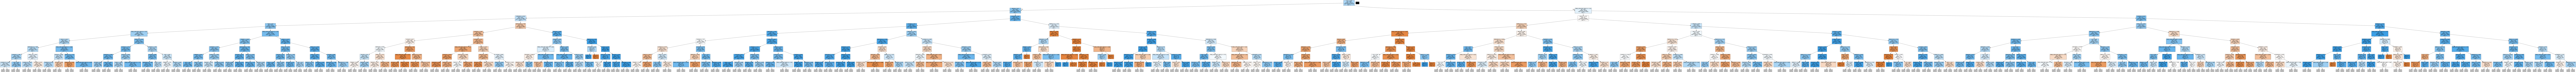

In [97]:
# Create DOT data
dot_data = tree.export_graphviz(
    model, out_file=None, feature_names=Xnew.columns, class_names=["0", "1"], filled=True, max_depth=8
)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

In [ ]:
import pandas as pd
import tkinter as tk
from tkinter import ttk, messagebox

# Create a class for the Patient Questionnaire application
class PatientQuestionnaireApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Patient Questionnaire")
        # Create labels and entry widgets for the questionnaire fields
        self.create_widgets()
        # Data storage
        self.data = []
    def create_widgets(self):
        
        # # Personal Information
        # personal_label = tk.Label(self.root, text="Personal Information", font=("Arial", 12, "bold"))
        # personal_label.grid(row=0, columnspan=2, sticky=tk.W)
        # self.create_label_entry("Case ID", 1)
        # self.create_label_entry("Year of Discharge", 2)
        # self.create_label_entry("Age at Admission", 3, self.age_options())
        # self.create_label_entry("Gender", 4, self.gender_options())
        # self.create_label_entry("Race", 5, self.race_options())
        # self.create_label_entry("Ethnicity", 6, self.ethnicity_options())
        # self.create_label_entry("Marital Status", 7, self.marital_status_options())
        # self.create_label_entry("Education Level", 8, self.education_options())
        # self.create_label_entry("Employment Status at Admission", 9, self.employment_options())
        # self.create_label_entry("Pregnant at Admission", 10, self.yes_no_options())
        # self.create_label_entry("Veteran Status", 11, self.yes_no_options())
        # self.create_label_entry("Living Arrangements at Admission", 12, self.living_arrangements_options())
        # self.create_label_entry("Source of Income/Support", 13, self.income_support_options())
        # self.create_label_entry("Number of Arrests in Past 30 Days", 14, self.arrests_options())

        # # Treatment Information
        # treatment_label = tk.Label(self.root, text="Treatment Information", font=("Arial", 12, "bold"))
        # treatment_label.grid(row=15, columnspan=2, sticky=tk.W)
        # self.create_label_entry("Type of Treatment/Service Setting at Admission", 16, self.treatment_setting_options())
        # self.create_label_entry("Medication-assisted Opioid Therapy", 17, self.yes_no_options())
        # self.create_label_entry("Days Waiting to Enter Substance Use Treatment", 18, self.days_waiting_options())
        # self.create_label_entry("Reason for Discharge", 19, self.discharge_reason_options())
        # self.create_label_entry("Length of Stay in Treatment (days)", 20, self.length_of_stay_options())

        # # Substance Use Information
        # substance_label = tk.Label(self.root, text="Substance Use Information", font=("Arial", 12, "bold"))
        # substance_label.grid(row=21, columnspan=2, sticky=tk.W)
        # self.create_label_entry("Primary Substance Use at Admission", 22, self.substance_use_options())
        # self.create_label_entry("Route of Administration (Primary)", 23, self.route_of_admin_options())
        # self.create_label_entry("Frequency of Use at Admission (Primary)", 24, self.frequency_options())
        # self.create_label_entry("Age at First Use (Primary)", 25, self.age_first_use_options())

        # # Secondary Substance Use Information
        # secondary_label = tk.Label(self.root, text="Secondary Substance Use Information", font=("Arial", 12, "bold"))
        # secondary_label.grid(row=26, columnspan=2, sticky=tk.W)
        # self.create_label_entry("Secondary Substance Use at Admission", 27, self.substance_use_options())
        # self.create_label_entry("Route of Administration (Secondary)", 28, self.route_of_admin_options())

        # # Save button
        # save_button = tk.Button(self.root, text="Save", command=self.save_data)
        # save_button.grid(row=29, columnspan=2)

        # Personal Information
        self.create_label_entry("Case ID", 0)
        self.create_label_entry("Year of Discharge", 1)
        self.create_label_entry("Age at Admission", 2, self.age_options())
        self.create_label_entry("Gender", 3, self.gender_options())
        self.create_label_entry("Race", 4, self.race_options())
        self.create_label_entry("Ethnicity", 5, self.ethnicity_options())
        self.create_label_entry("Marital Status", 6, self.marital_status_options())
        self.create_label_entry("Education Level", 7, self.education_options())
        self.create_label_entry("Employment Status at Admission", 8, self.employment_options())
        self.create_label_entry("Pregnant at Admission", 9, self.yes_no_options())
        self.create_label_entry("Veteran Status", 10, self.yes_no_options())
        self.create_label_entry("Living Arrangements at Admission", 11, self.living_arrangements_options())
        self.create_label_entry("Primary Scource of Payment", 12, self.prime_pay_options())
        self.create_label_entry("Census Division", 13, self.Census_Division())
        # Treatment Information
        self.create_label_entry("Type of Treatment/Service Setting at Admission", 14, self.treatment_setting_options())
        self.create_label_entry("Medication-assisted opioid therapy?", 15, self.yes_no_options())
        self.create_label_entry("Days Waiting to Enter Substance Use Treatment", 16, self.days_waiting_options())
        self.create_label_entry("How often will you use Self-Help Programs after?", 17, self.FREQ_ATND_SELF_HELP_D())
        self.create_label_entry("Length of Stay in Treatment (days)", 18, self.length_of_stay_options())
        # Substance Use Information
        self.create_label_entry("Primary Substance Use at Admission", 19, self.substance_use_options())
        self.create_label_entry("Route of Administration (Primary)", 20, self.route_of_admin_options())
        self.create_label_entry("Frequency of Use at Admission (Primary)", 21, self.frequency_options())
        self.create_label_entry("Age at First Use (Primary)", 22, self.age_first_use_options())
        # Secondary Substance Use Information
        self.create_label_entry("Secondary Substance Use at Admission", 23, self.substance_use_options())
        self.create_label_entry("Route of Administration (Secondary)", 24, self.route_of_admin_options())
        # Save button
        save_button = tk.Button(self.root, text="Save", command=self.save_data)
        save_button.grid(row=25, columnspan=2)

        

    def create_label_entry(self, text, row, options=None):
        label = tk.Label(self.root, text=text)
        label.grid(row=row, column=0, sticky=tk.W)
        if options:
            entry = ttk.Combobox(self.root, values=options)
        else:
            entry = tk.Entry(self.root)
        entry.grid(row=row, column=1)
        setattr(self, f"entry_{row}", entry)
    def save_data(self):
        # Collect the data
        row_data = []
        for i in range(25): 
            entry = getattr(self, f"entry_{i}")
            row_data.append(entry.get())
        # Append to data list
        self.data.append(row_data)
        # Convert to DataFrame and save to CSV
        columns = [
            "CASEID", "DISYR", "AGE", "GENDER", "RACE", "ETHNIC",
            "MARSTAT", "EDUC", "EMPLOY", "PREG",
            "VET", "LIVARAG", "PRIMPAY",
            "DIVISION", "SERVICES",
            "METHUSE", "DAYWAIT",
            "FREQ_ATND_SELF_HELP_D", " LOS", "SUB1",
            "ROUTE1", "FREQ1", "FRSTUSE1",
            "SUB2", "ROUTE2"
        ]

        # columns = [
        #     "Case ID", "Year of Discharge", "Age at Admission", "Gender", "Race", "Ethnicity",
        #     "Marital Status", "Education Level", "Employment Status at Admission", "Pregnant at Admission",
        #     "Veteran Status", "Living Arrangements at Admission", "Source of Income/Support",
        #     "Number of Arrests in Past 30 Days", "Type of Treatment/Service Setting at Admission",
        #     "Medication-assisted Opioid Therapy", "Days Waiting to Enter Substance Use Treatment",
        #     "Reason for Discharge", "Length of Stay in Treatment (days)", "Primary Substance Use at Admission",
        #     "Route of Administration (Primary)", "Frequency of Use at Admission (Primary)", "Age at First Use (Primary)",
        #     "Secondary Substance Use at Admission", "Route of Administration (Secondary)"
        # ]

        df = pd.DataFrame(self.data, columns=columns)
        #df.to_csv("patient_questionnaire_data.csv", index=False)
        # Save by Case ID
        grouped_data = df.groupby("CASEID")
        for case_id, group_df in grouped_data:
            group_df.to_csv(f"./Patient_Questionnaire_Data/patient_questionnaire_data_{case_id}.csv", index=False)
        # Confirmation message
        messagebox.showinfo("Saved", "Data saved successfully")
    def age_options(self):
        return [
            "12–14 years", "15–17 years", "18–20 years", "21–24 years", "25–29 years", "30–34 years", "35–39 years",
            "40–44 years", "45–49 years", "50–54 years", "55–64 years", "65 years and older"
        ]
    def gender_options(self):
        return ["Male", "Female", "Other", "Prefer not to say"]
    def race_options(self):
        return [
            "Alaska Native (Aleut, Eskimo, Indian)", "American Indian (other than Alaska Native)", "Asian or Pacific Islander",
            "Black or African American", "White", "Asian", "Other single race", "Two or more races", "Native Hawaiian or Other Pacific Islander"
        ]
    def ethnicity_options(self):
        return [
            "Puerto Rican", "Mexican", "Cuban or other specific Hispanic", "Not of Hispanic or Latino origin", "Hispanic or Latino, specific origin not specified"
        ]
    def marital_status_options(self):
        return ["Never married", "Now married", "Separated", "Divorced, Widowed"]
    def education_options(self):
        return [
            "Less than one school grade, no schooling, nursery school, or kindergarten to Grade 8", "Grades 9 to 11", "Grade 12 (or GED)",
            "1-3 years of college, university, or vocational school", "4 years of college, university, BA/BS, some postgraduate study, or more"
        ]
    def employment_options(self):
        return ["Full-time", "Part-time", "Unemployed", "Not in labor force"]
    def yes_no_options(self):
        return ["Yes", "No"]
    def living_arrangements_options(self):
        return ["Homeless", "Dependent living", "Independent living"]
    def prime_pay_options(self):
        return ["Self-pay", "Private insurance", "Medicare", " Medicaid", "Other government payments", " No charge", "Other"]
    def Census_Division(self):
        return ["U.S. territories", "New England", "Middle Atlantic", "East North Central", "West North Central", "South Atlantic", "East South Central", "West South Central", "Mountain", "Pacific"]
    def treatment_setting_options(self):
        return [
            "Detox, 24-hour, hospital inpatient", "Detox, 24-hour, free-standing residential", "Rehab/residential, hospital (non-detox)",
            "Rehab/residential, short term (30 days or fewer)", "Rehab/residential, long term (more than 30 days)",
            "Ambulatory, intensive outpatient", "Ambulatory, non-intensive outpatient", "Ambulatory, detoxification"
        ]
    def days_waiting_options(self):
        return ["0", "1–7", "8–14", "15–30", "31 or more"]
    def FREQ_ATND_SELF_HELP_D(self):
        return [
            "No attendance", "1–3 times per month", "4–7 times per month", "8–30 times per month",
            "Some attendance, frequency is unknown"
        ]
    def length_of_stay_options(self):
        return [
            "1 to 30", "31 to 45 days", "46 to 60 days", "61 to 90 days", "91 to 120 days", "121 to 180 days", "181 to 365 days", "More than a year"
        ]
    def substance_use_options(self):
        return [
            "None", "Alcohol", "Cocaine/crack", "Marijuana/hashish", "Heroin", "Non-prescription methadone", "Other opiates and synthetics",
            "PCP", "Hallucinogens", "Methamphetamine/speed", "Other amphetamines", "Other stimulants", "Benzodiazepines", "Other tranquilizers",
            "Barbiturates", "Other sedatives or hypnotics", "Inhalants", "Over-the-counter medications", "Other drugs"
        ]
    def route_of_admin_options(self):
        return ["Oral", "Smoking", "Inhalation", "Injection", "Other"]
    def frequency_options(self):
        return ["No use in the past month", "Some use", "Daily use"]
    def age_first_use_options(self):
        return [
            "11 years and under", "12–14 years", "15–17 years", "18–20 years", "21–24 years", "25–29 years", "30 years and over"
        ]
# if __name__ == "__main__":
#     root = tk.Tk()
#     app = PatientQuestionnaireApp(root)
#     root.mainloop()

if __name__ == "__main__":
    root = tk.Tk()
    app = PatientQuestionnaireApp(root)
    root.mainloop()

In [464]:
patient_questionnaire = pd.read_csv("patient_questionnaire_data_11111.csv")

In [468]:
 # Define features set
df3 = patient_questionnaire.copy()
df3 = df3[["MARSTAT", "EMPLOY", "LIVARAG", "DAYWAIT", "SERVICES", "FRSTUSE1", "FREQ_ATND_SELF_HELP_D", "PRIMPAY", "DIVISION", "PREG", "METHUSE"]]


In [471]:
df3['MARSTAT'] = df3['MARSTAT'].replace('Never married', 1)
df3['MARSTAT'] = df3['MARSTAT'].replace('Now married', 2)
df3['MARSTAT'] = df3['MARSTAT'].replace('Separated', 3)
df3['MARSTAT'] = df3['MARSTAT'].replace('Divorced, widowed', 4)

df3['EMPLOY'] = df3['EMPLOY'].replace('Full-time', 1)
df3['EMPLOY'] = df3['EMPLOY'].replace('Part-time', 2)
df3['EMPLOY'] = df3['EMPLOY'].replace('Unemployed', 3)
df3['EMPLOY'] = df3['EMPLOY'].replace('Not in labor force', 4)

df3['LIVARAG'] = df3['LIVARAG'].replace('Homeless', 1)
df3['LIVARAG'] = df3['LIVARAG'].replace('Dependent living', 2)
df3['LIVARAG'] = df3['LIVARAG'].replace('Independent living', 3)

df3['DAYWAIT'] = df3['DAYWAIT'].replace('1–7', 1)
df3['DAYWAIT'] = df3['DAYWAIT'].replace('8–14', 2)
df3['DAYWAIT'] = df3['DAYWAIT'].replace('15–30', 3)
df3['DAYWAIT'] = df3['DAYWAIT'].replace('31 or more', 4)

df3['SERVICES'] = df3['SERVICES'].replace('Detox, 24-hour, hospital inpatient', 1)
df3['SERVICES'] = df3['SERVICES'].replace('Detox, 24-hour, free-standing residential', 2)
df3['SERVICES'] = df3['SERVICES'].replace('Rehab/residential, hospital (non-detox)', 3)
df3['SERVICES'] = df3['SERVICES'].replace('Rehab/residential, short term (30 days or fewer)', 4)
df3['SERVICES'] = df3['SERVICES'].replace('Rehab/residential, long term (more than 30 days)', 5)
df3['SERVICES'] = df3['SERVICES'].replace('Ambulatory, intensive outpatient', 6)
df3['SERVICES'] = df3['SERVICES'].replace('Ambulatory, non-intensive outpatient', 7)
df3['SERVICES'] = df3['SERVICES'].replace('Ambulatory, detoxification', 8)

df3['FRSTUSE1'] = df3['FRSTUSE1'].replace('11 years and under', 1)
df3['FRSTUSE1'] = df3['FRSTUSE1'].replace('12–14 years', 2)
df3['FRSTUSE1'] = df3['FRSTUSE1'].replace('15–17 years', 3)
df3['FRSTUSE1'] = df3['FRSTUSE1'].replace('18–20 years', 4)
df3['FRSTUSE1'] = df3['FRSTUSE1'].replace('21–24 years', 5)
df3['FRSTUSE1'] = df3['FRSTUSE1'].replace('25–29 years', 6)
df3['FRSTUSE1'] = df3['FRSTUSE1'].replace('30 years and over', 7)

df3['FREQ_ATND_SELF_HELP_D'] = df3['FREQ_ATND_SELF_HELP_D'].replace('No attendance', 1)
df3['FREQ_ATND_SELF_HELP_D'] = df3['FREQ_ATND_SELF_HELP_D'].replace('1–3 times per month', 2)
df3['FREQ_ATND_SELF_HELP_D'] = df3['FREQ_ATND_SELF_HELP_D'].replace('4–7 times per month', 3)
df3['FREQ_ATND_SELF_HELP_D'] = df3['FREQ_ATND_SELF_HELP_D'].replace('8–30 times per month', 4)
df3['FREQ_ATND_SELF_HELP_D'] = df3['FREQ_ATND_SELF_HELP_D'].replace('Some attendance, frequency is unknown', 5)

df3['PRIMPAY'] = df3['PRIMPAY'].replace('Self-pay', 1)
df3['PRIMPAY'] = df3['PRIMPAY'].replace('Private insurance', 1)
df3['PRIMPAY'] = df3['PRIMPAY'].replace('Medicare', 1)
df3['PRIMPAY'] = df3['PRIMPAY'].replace('Medicaid', 1)
df3['PRIMPAY'] = df3['PRIMPAY'].replace('Other government payments', 1)
df3['PRIMPAY'] = df3['PRIMPAY'].replace('No charge', 1)
df3['PRIMPAY'] = df3['PRIMPAY'].replace('Other', 1)

df3['DIVISION'] = df3['DIVISION'].replace('U.S. territories', 0)
df3['DIVISION'] = df3['DIVISION'].replace('New England', 1)
df3['DIVISION'] = df3['DIVISION'].replace('Middle Atlantic', 2)
df3['DIVISION'] = df3['DIVISION'].replace('East North Central', 1)
df3['DIVISION'] = df3['DIVISION'].replace('West North Central', 1)
df3['DIVISION'] = df3['DIVISION'].replace('South Atlantic', 1)
df3['DIVISION'] = df3['DIVISION'].replace('East South Central', 1)
df3['DIVISION'] = df3['DIVISION'].replace('West South Central', 1)
df3['DIVISION'] = df3['DIVISION'].replace('Mountain', 1)
df3['DIVISION'] = df3['DIVISION'].replace('Pacific', 1)

df3['PREG'] = df3['PREG'].replace('Yes', 1)
df3['PREG'] = df3['PREG'].replace('No', 2)

df3['METHUSE'] = df3['METHUSE'].replace('Yes', 1)
df3['METHUSE'] = df3['METHUSE'].replace('No', 2)






C:\Users\matth\AppData\Local\Temp\ipykernel_26824\512962658.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df3['MARSTAT'] = df3['MARSTAT'].replace('Never married', 1)
C:\Users\matth\AppData\Local\Temp\ipykernel_26824\512962658.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df3['EMPLOY'] = df3['EMPLOY'].replace('Part-time', 2)
C:\Users\matth\AppData\Local\Temp\ipykernel_26824\512962658.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior,

In [472]:
y3 = df2["REASON"].values.reshape(-1, 1)
X3 = df3.copy()
# X3.drop("REASON", axis=1, inplace=True)
X_train = df2[["MARSTAT", "EMPLOY", "LIVARAG", "DAYWAIT", "SERVICES", "FRSTUSE1", "FREQ_ATND_SELF_HELP_D", "PRIMPAY", "DIVISION", "PREG", "METHUSE"]] 
X_test = df3[["MARSTAT", "EMPLOY", "LIVARAG", "DAYWAIT", "SERVICES", "FRSTUSE1", "FREQ_ATND_SELF_HELP_D", "PRIMPAY", "DIVISION", "PREG", "METHUSE"]]
y_train = df2["REASON"].values.reshape(-1, 1)
# y_test = train_test_split(X2, y2, random_state=78)
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
 # Create the decision tree classifier instance
model = tree.DecisionTreeClassifier()
 # Fit the model
model = model.fit(X_train_scaled, y_train)

 # Making predictions using the testing data
predictions = model.predict(X_test_scaled)
print(predictions)

[0]
